# SENTIMENT ANALYSIS USING NAIVE BAYES

### About the dataset: 
In this dataset, It contains diffrent kinds of tweets and label them with specific word(i.e. joy, sadness, fear , love ,anger, surprise)

### Import required libraries

In [1]:
#Import NumPy library
import numpy as np

#Import Pandas library
import pandas as pd

#Import matplotlib library
import matplotlib.pyplot as plt

#import seaborn library
import seaborn as sns

#Import Wordcloud library
from wordcloud import WordCloud

#Import textblob library
from textblob import TextBlob

#Import re
import re

### Load the Data

In [2]:
train_data = pd.read_csv(r'train.txt',sep= ';',names=['text','label'])

In [3]:
#Review the data
train_data.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
#check the shape of data
print(train_data.shape)

(16000, 2)


In [5]:
#check the value counts of label column
train_data['label'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

### Differenciate label into positive and negative 

In [6]:
# Make a function called sentiment and grouping label into positive and negative
def sentiment(text):
    if text in ['joy','love','surprise']:
        return 'Positive'
    else:
        return 'Negative'

In [7]:
#Add a new column named sentiment into train_data
train_data['Sentiment'] = train_data['label'].apply(sentiment)

In [8]:
#review the data
train_data.head()

,text,label,Sentiment
0,i didnt feel humiliated,sadness,Negative
1,i can go from feeling so hopeless to so damned...,sadness,Negative
2,im grabbing a minute to post i feel greedy wrong,anger,Negative
3,i am ever feeling nostalgic about the fireplac...,love,Positive
4,i am feeling grouchy,anger,Negative


### Check the Negative tweets

In [9]:
#show negative tweets only and review first 10 rows
train_data[train_data['Sentiment']=='Negative'].head(10)

,text,label,Sentiment
0,i didnt feel humiliated,sadness,Negative
1,i can go from feeling so hopeless to so damned...,sadness,Negative
2,im grabbing a minute to post i feel greedy wrong,anger,Negative
4,i am feeling grouchy,anger,Negative
5,ive been feeling a little burdened lately wasn...,sadness,Negative
7,i feel as confused about life as a teenager or...,fear,Negative
10,i feel like i have to make the suffering i m s...,sadness,Negative
12,i think it s the easiest time of year to feel ...,anger,Negative
13,i feel low energy i m just thirsty,sadness,Negative
16,i didnt really feel that embarrassed,sadness,Negative


In [10]:
#Make a list of negative tweets
text_list = list(train_data[train_data['Sentiment']=='Negative']['text'])
text = " ".join(text_list)

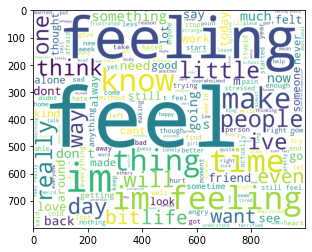

In [11]:
#wordcloud or tag cloud means the graphical representation which gives the words in a graph form
#Make wordcloud
wc=WordCloud(background_color = 'white',width=1000,height=800).generate(text)
plt.imshow(wc)
plt.show()

### Check the Positive tweets

In [12]:
#Show positive tweets and check first 10 rows
train_data[train_data['Sentiment']=='Positive'].head(10)

,text,label,Sentiment
3,i am ever feeling nostalgic about the fireplac...,love,Positive
6,ive been taking or milligrams or times recomme...,surprise,Positive
8,i have been with petronas for years i feel tha...,joy,Positive
9,i feel romantic too,love,Positive
11,i do feel that running is a divine experience ...,joy,Positive
14,i have immense sympathy with the general point...,joy,Positive
15,i do not feel reassured anxiety is on each side,joy,Positive
22,i have the feeling she was amused and delighted,joy,Positive
23,i was able to help chai lifeline with your sup...,joy,Positive
29,i feel more superior dead chicken or grieving ...,joy,Positive


In [13]:
#Make a list of negative tweets
text_list1 = list(train_data[train_data['Sentiment']=='Positive']['text'])
text1 = " ".join(text_list)

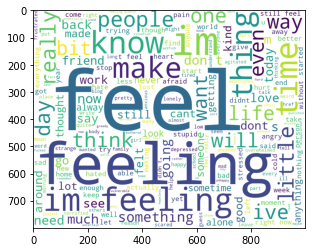

In [14]:
#Make wordcloud
wc=WordCloud(background_color = 'white',width=1000,height=800).generate(text1)
plt.imshow(wc)
plt.show()

### Clean the data

In [15]:
# Import string and check the punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
import nltk

In [17]:
# Downloads stop words
#nltk.download('stopwords')

In [18]:
# Import stopwords from corpus
from nltk.corpus import stopwords

In [19]:
st = stopwords.words('english')
st.append("and")

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vectorizer = CountVectorizer()

In [22]:
# Remove stopwords and Punctuation
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_removed = ''.join(test_punc_removed)
    test_punc_st_removed = []
    for char in test_punc_removed.split():
        if char.lower() not in st:
            test_punc_st_removed.append(char)
    test_punc_st_removed = " ".join(test_punc_st_removed)  
    return test_punc_st_removed


In [23]:
#test the message cleaning function
message_cleaning("Goblin and Ninja fOR thE win!!")


'Goblin Ninja win'

In [24]:
#apply function on train_data
train_data_clean = train_data['text'].apply(message_cleaning)

In [25]:
train_data_clean

0                                    didnt feel humiliated
1        go feeling hopeless damned hopeful around some...
2                im grabbing minute post feel greedy wrong
3        ever feeling nostalgic fireplace know still pr...
4                                          feeling grouchy
                               ...                        
15995        brief time beanbag said anna feel like beaten
15996    turning feel pathetic still waiting tables sub...
15997                             feel strong good overall
15998                       feel like rude comment im glad
15999                         know lot feel stupid portray
Name: text, Length: 16000, dtype: object

In [26]:
#before message cleaning
train_data['text'][5]

'ive been feeling a little burdened lately wasnt sure why that was'

In [27]:
#after message cleaning
train_data_clean[5]

'ive feeling little burdened lately wasnt sure'

In [28]:
#convert train_data_clean into list
data = train_data_clean.tolist()

In [29]:
tweets_countvectorizer = CountVectorizer().fit_transform(data).toarray()

In [30]:
#check the shape
tweets_countvectorizer.shape

(16000, 15046)

In [31]:
#assign data to x and y
X = tweets_countvectorizer
y = train_data['label']

In [32]:
#check the shape of x
X.shape

(16000, 15046)

In [33]:
# check the shape of y
y.shape

(16000,)

### Split the Data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Build the model

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
model = MultinomialNB()

In [38]:
#fit the model
model.fit(X_train, y_train)

MultinomialNB()

In [39]:
#Do predictions
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
#Make confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 262,    9,   44,    0,   96,    0],
       [  18,  229,   53,    1,   97,    1],
       [   9,    3, 1025,    6,   56,    0],
       [   4,    2,  150,   74,   41,    0],
       [   5,   10,   33,    1,  859,    2],
       [   5,   17,   36,    0,   41,   11]], dtype=int64)

<AxesSubplot:>

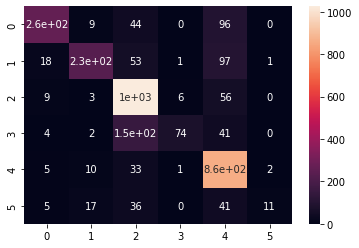

In [42]:
#plot heatmap
import seaborn as sns
sns.heatmap(cm, annot = True)

In [43]:
#Check the accuracy
ac = accuracy_score(y_test, y_pred)
ac

0.76875

In [44]:
#Make classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.86      0.64      0.73       411
        fear       0.85      0.57      0.68       399
         joy       0.76      0.93      0.84      1099
        love       0.90      0.27      0.42       271
     sadness       0.72      0.94      0.82       910
    surprise       0.79      0.10      0.18       110

    accuracy                           0.77      3200
   macro avg       0.81      0.58      0.61      3200
weighted avg       0.79      0.77      0.74      3200

